In [2]:
from prophet import Prophet
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from govuk_bank_holidays.bank_holidays import BankHolidays


c:\Users\izzfa\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Ignore

In [238]:
bank_holidays = BankHolidays()
# for bank_holiday in bank_holidays.get_holidays():
    # print(bank_holiday['title'], 'is on', bank_holiday['date'])
# print(bank_holidays.get_next_holiday())

# see govuk_bank_holidays/bank_holidays.py source file for more methods and argument details…

# choose a different locale for holiday titles and notes
bank_holidays = BankHolidays(locale='cy')

# use cached holidays if internet connection is not desired
bank_holidays = BankHolidays(use_cached_holidays=True)
# bank_holidays

In [232]:
fp_weath = r"C:\Users\izzfa\Documents\Data Science\Year 2\Y2Q4\DC2\Data\london_weather.csv"
weather = pd.read_csv(fp_weath)
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')

# Set 'Date' column as the index
weather.set_index('date', inplace=True)

# Resample to monthly frequency and calculate the mean
weather = weather.resample('M', loffset='MS').mean()

# Print the monthly averages
newdf = weather.reset_index()
newdf = newdf[newdf['date']>='2010-12-01']
newdf = newdf[['date', 'mean_temp', 'precipitation']]
# newdf

C:\Users\izzfa\AppData\Local\Temp\ipykernel_16292\3696865146.py:9: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weather = weather.resample('M', loffset='MS').mean()


In [233]:
# Generate date range for the first day of every month
start_date = '2021-01-01'
end_date = '2023-03-01'
daterange = pd.date_range(start=start_date, end=end_date, freq='MS')
date = pd.DataFrame({'date':daterange})
# Concatenate the existing dataframe and the new dataframe
extended_df = pd.concat([newdf, date], ignore_index=True)

# Set 'Date' column as the index
extended_df.set_index('date', inplace=True)

# Linear interpolation to impute missing values or extend existing data
df_interpolated = extended_df.interpolate(method='linear')

# Reset index to restore the 'Date' column
df_interpolated.reset_index(inplace=True)

# Print the imputed dataframe
# df_interpolated

# Loading Data

In [3]:
filepath_barn = "../../Data/ward_data.parquet"

barnet = pq.read_pandas(filepath_barn).to_pandas()
# Remove commas and convert to integers
barnet['Mid-2020 population'] = barnet['Mid-2020 population'].str.replace(',', '').astype(int)
barnet['People per Sq Km'] = barnet['People per Sq Km'].str.replace(',', '').astype(int)

burglary_counts = barnet.groupby(['Month', 'WD22NM'])['Crime type'].count().reset_index()
burglary_counts.rename(columns={'Crime type': 'Burglaries'}, inplace=True)
barnet = barnet.merge(burglary_counts, on=['Month','WD22NM'], how='left')

barnet['Month'] = pd.to_datetime(barnet['Month'])
barnet = barnet.sort_values('Month')
barnet

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,LSOA21NM,WD22NM,LSOA Code,Mid-2020 population,Area Sq Km,People per Sq Km,Burglaries
25504,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.164205,51.613222,On or near Lewes Road,E01000324,Barnet 015F,Burglary,None,NaN,Barnet 015F,Woodhouse,E01000324,1851,0.27,6820,10
31048,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.157661,51.652137,On or near Langford Road,E01000166,Barnet 003A,Burglary,None,NaN,Barnet 003A,East Barnet,E01000166,1619,0.37,4379,16
8551,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.186585,51.604371,On or near Willow Way,E01000298,Barnet 023D,Burglary,None,NaN,Barnet 023D,West Finchley,E01000298,2007,0.27,7545,27
19476,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.213734,51.567559,On or near Cotswold Gardens,E01000222,Barnet 040C,Burglary,None,NaN,Barnet 040C,Cricklewood,E01000222,1975,0.42,4748,11
19477,None,2010-12-01,Metropolitan Police Service,Metropolitan Police Service,-0.214454,51.570906,On or near Prayle Grove,E01000222,Barnet 040C,Burglary,None,NaN,Barnet 040C,Cricklewood,E01000222,1975,0.42,4748,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,5edebc29e8ee6a316ce91e3dc7de4cacafe6901d6a1045...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.188374,51.574652,On or near Corringham Road,E01000214,Barnet 038E,Burglary,Under investigation,NaN,Barnet 038E,Childs Hill,E01000214,1909,0.33,5762,20
18013,b6106017b050bf4b1f4d17100c391c6fcd626985049973...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.215314,51.557290,On or near,E01000141,Barnet 039A,Burglary,Under investigation,NaN,Barnet 039A,Cricklewood,E01000141,2258,0.37,6094,9
18014,2ab650a481ac9e02643ee99659a846237f2d25006aab8e...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.216684,51.559259,On or near Kara Way,E01000141,Barnet 039A,Burglary,Under investigation,NaN,Barnet 039A,Cricklewood,E01000141,2258,0.37,6094,9
38649,e52bf021cbf673d1a3742f2ffc7033f164958ebdf5ad25...,2023-03-01,Metropolitan Police Service,Metropolitan Police Service,-0.205638,51.652907,On or near Coe'S Alley,E01000250,Barnet 001C,Burglary,Under investigation,NaN,Barnet 001C,High Barnet,E01000250,2793,0.58,4803,6


# Processing Data

In [4]:
allW = barnet[['Month', 'WD22NM', 'Burglaries']]
allW = allW.drop_duplicates()

# Group the data by ward and aggregate the number of burglaries
allW = allW.groupby(['Month', 'WD22NM']).sum().reset_index()

# Create a new dataframe with the dates and aggregated number of burglaries per ward
ward_data = allW.pivot(index='Month', columns='WD22NM', values='Burglaries')
ward_data = ward_data.reset_index()


# Rename columns to match Prophet's requirements
ward_data.rename(columns={'Month': 'ds'}, inplace=True)
wd2 = ward_data.copy()
# Create a column for the total number of burglaries across all wards
wd2['y'] = wd2.drop('ds', axis=1).sum(axis=1)

# Set 'Date' column as the index
ward_data.set_index('ds', inplace=True)

# Linear interpolation to impute missing values or extend existing data
df_interpolated = ward_data.interpolate(method='linear')

# Reset index to restore the 'Date' column
df_interpolated.reset_index(inplace=True)

# Print the imputed dataframe
# df_interpolated
wd2

WD22NM,ds,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,...,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse,y
0,2010-12-01,13.0,13.0,10.0,20.0,7.0,11.0,16.0,18.0,20.0,...,33.0,14.0,25.0,10.0,8.0,27.0,16.0,9.0,10.0,363.0
1,2011-01-01,23.0,15.0,14.0,41.0,5.0,13.0,20.0,19.0,12.0,...,29.0,21.0,30.0,17.0,15.0,30.0,19.0,14.0,21.0,476.0
2,2011-02-01,20.0,22.0,10.0,24.0,5.0,20.0,12.0,13.0,13.0,...,24.0,15.0,18.0,13.0,5.0,23.0,22.0,15.0,17.0,395.0
3,2011-03-01,15.0,13.0,6.0,33.0,8.0,25.0,13.0,14.0,4.0,...,39.0,17.0,23.0,8.0,22.0,22.0,12.0,17.0,6.0,399.0
4,2011-04-01,25.0,15.0,16.0,37.0,6.0,28.0,15.0,8.0,9.0,...,33.0,18.0,15.0,16.0,18.0,23.0,15.0,17.0,11.0,403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,2022-11-01,5.0,4.0,11.0,32.0,5.0,15.0,5.0,3.0,8.0,...,18.0,10.0,7.0,13.0,5.0,16.0,11.0,11.0,15.0,234.0
144,2022-12-01,9.0,5.0,13.0,21.0,6.0,13.0,11.0,6.0,10.0,...,12.0,NaN,13.0,15.0,3.0,9.0,9.0,10.0,7.0,211.0
145,2023-01-01,5.0,7.0,11.0,21.0,5.0,13.0,9.0,5.0,10.0,...,15.0,9.0,10.0,15.0,5.0,17.0,11.0,NaN,4.0,223.0
146,2023-02-01,2.0,14.0,4.0,21.0,3.0,15.0,5.0,5.0,11.0,...,11.0,7.0,12.0,12.0,2.0,5.0,10.0,3.0,6.0,184.0


# Ignore

In [192]:
#IGNORE

UK_bankhols = pd.DataFrame()
# UK_bankhols['Month'] = ['2010-01', '2010-04', '2010-04', '2010-05', '2010-05', '2010-08', '2010-12', '2010-12']
# UK_bankhols['Holiday'] = ['New Year\'s', 'Good Friday', 'Easter Monday', 'Early May bank holiday', 
                        #   'Spring bank holiday', 'Summer bank holiday', 'Christmas Day', 'Boxing Day']
# UK_bankhols['Month'] = pd.to_datetime(UK_bankhols['Month'])

# Set of dates to replicate per year
dates_to_replicate = pd.to_datetime(['2010-01', '2010-04', '2010-04', '2010-05', '2010-05', '2010-08', '2010-12', '2010-12'])

# Number of years to add to each date
num_years = 5

# Replicate the dates per year
replicated_dates = []
for date in dates_to_replicate:
    replicated_dates.extend(pd.date_range(date, periods=num_years, freq='AS'))

# Print the replicated dates
UK_bankhols['Month'] = replicated_dates
# UK_bankhols


# Model for all of barnet burglaries

In [8]:
m1 = Prophet(interval_width=0.95, seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.2)
m2 = Prophet(interval_width=0.95, seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.05)
m3 = Prophet(interval_width=0.95, seasonality_mode='additive',yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.1)

model1 = m1.fit(wd2)
model2 = m2.fit(wd2)
model3 = m3.fit(wd2)

13:57:01 - cmdstanpy - INFO - Chain [1] start processing
13:57:01 - cmdstanpy - INFO - Chain [1] done processing
13:57:02 - cmdstanpy - INFO - Chain [1] start processing
13:57:02 - cmdstanpy - INFO - Chain [1] done processing
13:57:02 - cmdstanpy - INFO - Chain [1] start processing
13:57:02 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Make predictions for each ward
future1 = m1.make_future_dataframe(periods=2, freq='M')
future2 = m2.make_future_dataframe(periods=2, freq='M')
future3 = m3.make_future_dataframe(periods=2, freq='M')
forecast1 = m1.predict(future1)
forecast2 = m2.predict(future2)
forecast3 = m3.predict(future3)
forecast1.set_index('ds', inplace=True)
forecast2.set_index('ds', inplace=True)
forecast3.set_index('ds', inplace=True)

# Combine the forecasts using simple averaging
# ensemble_forecast = (forecast1['yhat'] + forecast2['yhat'] + forecast3['yhat']) / 3.0

# Concatenate the three dataframes into a single dataframe
merged_df = pd.concat([forecast1, forecast2, forecast3])

# Calculate the average row-wise
averaged_df = merged_df.groupby(merged_df.index).mean().reset_index()

# ward_forecast = forecast[['ds'] + [col for col in forecast.columns if col.startswith('yhat')]]
# ward_forecast = forecast[[col for col in forecast.columns]]

# ward_forecast
# ensemble_forecast
averaged_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-12-01,407.787469,361.503740,496.973372,407.787469,407.787469,22.225688,22.225688,22.225688,22.225688,22.225688,22.225688,0.0,0.0,0.0,430.013157
1,2011-01-01,405.731180,376.128885,511.582435,405.731180,405.731180,34.961910,34.961910,34.961910,34.961910,34.961910,34.961910,0.0,0.0,0.0,440.693090
2,2011-02-01,403.674891,341.688788,477.974084,403.674891,403.674891,4.567085,4.567085,4.567085,4.567085,4.567085,4.567085,0.0,0.0,0.0,408.241975
3,2011-03-01,401.817598,336.232837,474.641268,401.817598,401.817598,3.613350,3.613350,3.613350,3.613350,3.613350,3.613350,0.0,0.0,0.0,405.430948
4,2011-04-01,399.761308,310.520956,448.861169,399.761308,399.761308,-19.366939,-19.366939,-19.366939,-19.366939,-19.366939,-19.366939,0.0,0.0,0.0,380.394369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2023-01-01,178.161284,146.209329,280.510803,178.161284,178.161284,34.961910,34.961910,34.961910,34.961910,34.961910,34.961910,0.0,0.0,0.0,213.123193
146,2023-02-01,176.381706,109.503910,248.130364,176.381706,176.381706,4.567085,4.567085,4.567085,4.567085,4.567085,4.567085,0.0,0.0,0.0,180.948790
147,2023-03-01,174.774345,110.021907,248.968664,174.774345,174.774345,3.613350,3.613350,3.613350,3.613350,3.613350,3.613350,0.0,0.0,0.0,178.387695
148,2023-03-31,173.052173,122.041685,254.308193,172.987180,173.102685,14.648857,14.648857,14.648857,14.648857,14.648857,14.648857,0.0,0.0,0.0,187.701030


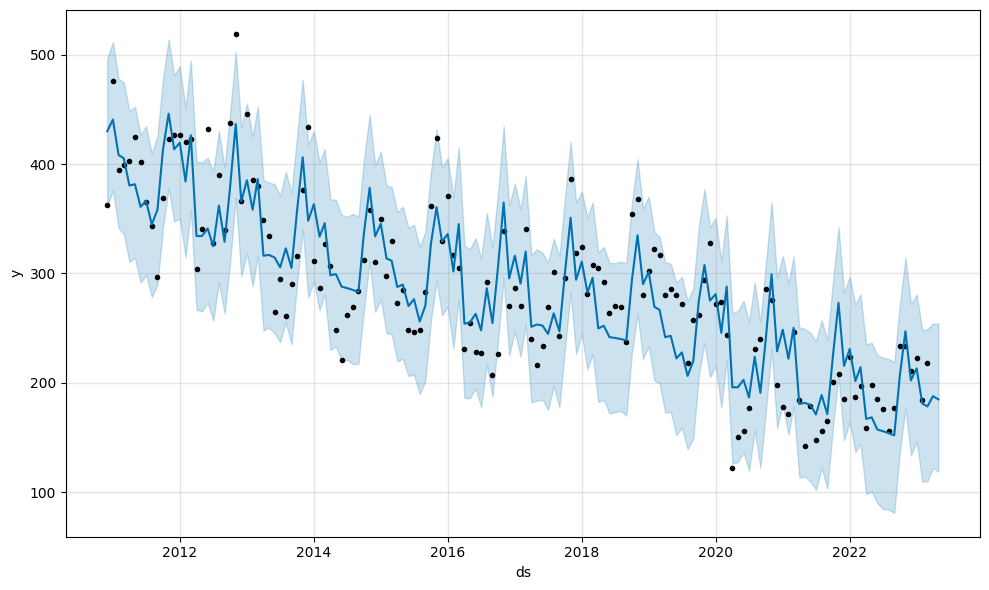

In [27]:
plot2 = m2.plot(averaged_df)

In [28]:
pred = averaged_df[averaged_df['ds']<='2023-03-01']
# Calculate MSE
mse = mean_squared_error(wd2['y'], pred['yhat'])

# Calculate R2 score
r2 = r2_score(wd2['y'], pred['yhat'])
r2, mse

(0.8088875334201231, 1201.1686120388492)

# Model for per ward

In [5]:
# Initialize a dictionary to store the forecasts per ward
ward_forecasts = {}
# Iterate over each ward
for ward in df_interpolated.columns[1:]:
    # Create a new dataframe for the current ward
    ward_df = df_interpolated[['ds', ward]].rename(columns={ward: 'y'})
    m4 = Prophet(interval_width=0.95, seasonality_mode='additive',yearly_seasonality=True, 
                 weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.2, seasonality_prior_scale=7.0,)
    
    m4.fit(ward_df)
    # Make future predictions for the current ward
    future = m4.make_future_dataframe(periods=2, freq='M')


    forecast = m4.predict(future)

    forecast.set_index('ds', inplace=True)

    # Store the forecast for the current ward in the dictionary
    # ward_forecasts[ward] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    ward_forecasts[ward] = forecast



16:03:23 - cmdstanpy - INFO - Chain [1] start processing
16:03:24 - cmdstanpy - INFO - Chain [1] done processing
16:03:24 - cmdstanpy - INFO - Chain [1] start processing
16:03:24 - cmdstanpy - INFO - Chain [1] done processing
16:03:24 - cmdstanpy - INFO - Chain [1] start processing
16:03:24 - cmdstanpy - INFO - Chain [1] done processing
16:03:24 - cmdstanpy - INFO - Chain [1] start processing
16:03:25 - cmdstanpy - INFO - Chain [1] done processing
16:03:25 - cmdstanpy - INFO - Chain [1] start processing
16:03:25 - cmdstanpy - INFO - Chain [1] done processing
16:03:25 - cmdstanpy - INFO - Chain [1] start processing
16:03:25 - cmdstanpy - INFO - Chain [1] done processing
16:03:25 - cmdstanpy - INFO - Chain [1] start processing
16:03:25 - cmdstanpy - INFO - Chain [1] done processing
16:03:25 - cmdstanpy - INFO - Chain [1] start processing
16:03:26 - cmdstanpy - INFO - Chain [1] done processing
16:03:26 - cmdstanpy - INFO - Chain [1] start processing
16:03:26 - cmdstanpy - INFO - Chain [1]

In [6]:
# Access the forecast for a specific ward
specific_ward_forecast = ward_forecasts['Barnet Vale']
# Print the forecast for a specific ward
specific_ward_forecast


,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2010-12-01,19.587925,14.664990,33.288045,19.587925,19.587925,4.261620,4.261620,4.261620,4.261620,4.261620,4.261620,0.0,0.0,0.0,23.849545
2011-01-01,19.496808,11.702191,30.509191,19.496808,19.496808,1.488042,1.488042,1.488042,1.488042,1.488042,1.488042,0.0,0.0,0.0,20.984850
2011-02-01,19.405690,10.385318,28.352964,19.405690,19.405690,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,0.0,0.0,0.0,19.243610
2011-03-01,19.323390,9.409966,28.390342,19.323390,19.323390,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,0.0,0.0,0.0,18.861074
2011-04-01,19.232273,7.992945,26.362146,19.232273,19.232273,-2.307112,-2.307112,-2.307112,-2.307112,-2.307112,-2.307112,0.0,0.0,0.0,16.925161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01,5.102938,-2.444938,16.276429,5.102938,5.102938,1.488042,1.488042,1.488042,1.488042,1.488042,1.488042,0.0,0.0,0.0,6.590980
2023-02-01,4.974195,-4.077629,14.168264,4.974195,4.974195,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,-0.162080,0.0,0.0,0.0,4.812116
2023-03-01,4.857912,-4.389061,13.144663,4.857912,4.857912,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,-0.462317,0.0,0.0,0.0,4.395595


In [17]:
forecastedW = {}

for ward in ward_forecasts:
    # print(ward)
    # print(ward_forecasts[ward]['yhat'].iloc[-2:])
    
    # Get the last two forecasted values for the ward
    values = ward_forecasts[ward]['yhat'].iloc[-2:].values.tolist()
    
    # Append the ward and its values to the dictionary
    forecastedW[ward] = values

new_df = pd.DataFrame(forecastedW)
new_df


,Barnet Vale,Brunswick Park,Burnt Oak,Childs Hill,Colindale North,Cricklewood,East Barnet,East Finchley,Edgware,Edgwarebury,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
0,5.399058,-0.203176,12.709179,17.457036,4.663495,13.648426,7.711101,-1.501494,7.808892,-2.299933,...,11.673276,23.002356,17.303669,9.370372,14.903620,-0.229072,10.473824,4.343143,3.804328,8.356939
1,12.813292,9.088968,11.903041,24.972676,4.506903,3.741589,4.599341,14.239290,7.243229,10.490790,...,-0.065981,7.167667,15.781980,11.336605,8.685463,4.701289,0.766992,10.887791,10.258329,6.924843


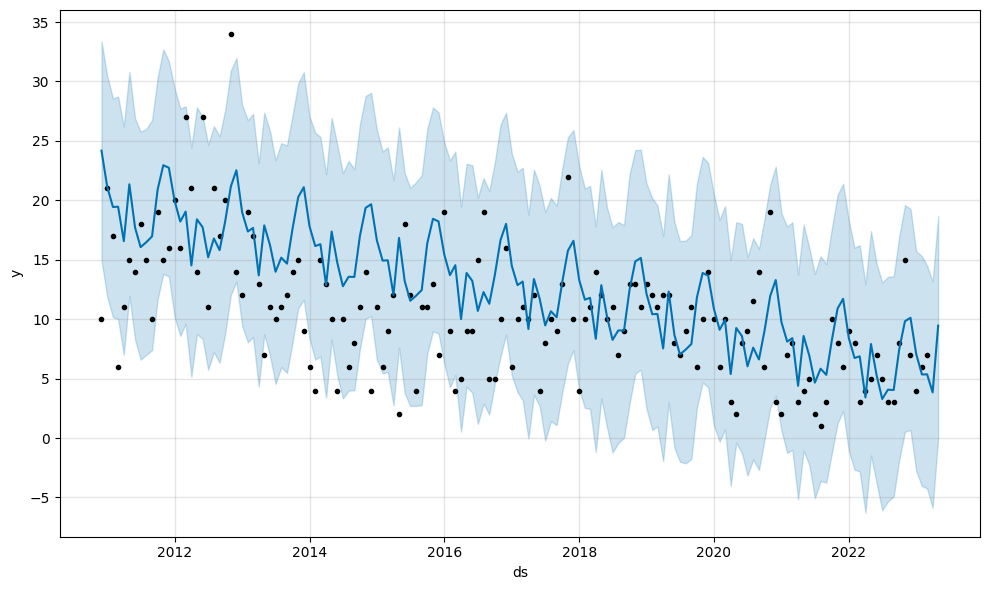

In [52]:
plot3 = m4.plot(specific_ward_forecast)

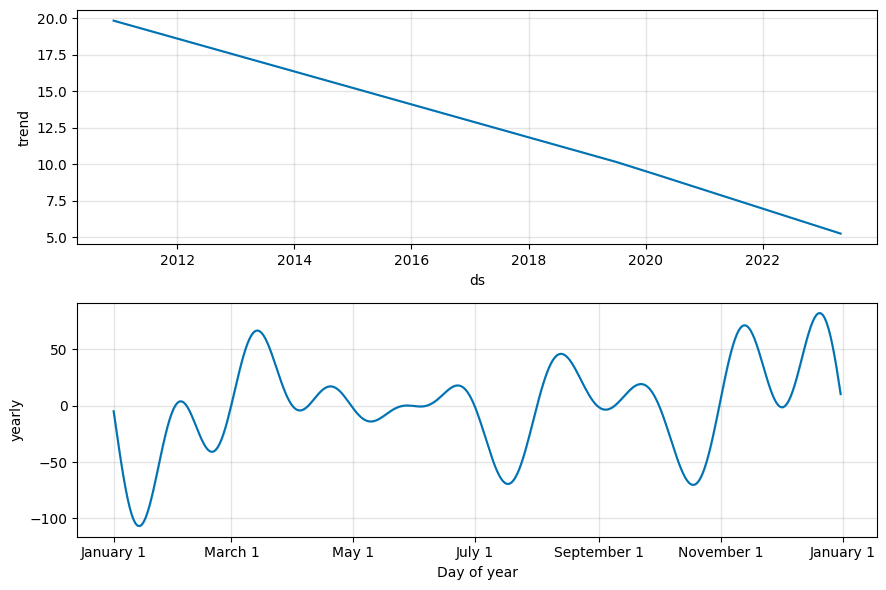

In [53]:
plot3 = m4.plot_components(specific_ward_forecast)

In [54]:
pred = specific_ward_forecast[specific_ward_forecast['ds']<='2023-03-01']
# Calculate MSE
mse = mean_squared_error(df_interpolated['Barnet Vale'], pred['yhat'])
mse

23.202693592425362

In [55]:
# Calculate R2 score
r2 = r2_score(df_interpolated['Barnet Vale'], pred['yhat'])
r2

0.5010658376665978

# Not Important 

In [57]:
# Assuming you have a monthly frequency for your data
start_date = pd.to_datetime('2023-04-01')
end_date = pd.to_datetime('2023-05-01')

# Create a range of dates from start_date to end_date with monthly frequency
future_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
future_dates

DatetimeIndex(['2023-04-01', '2023-05-01'], dtype='datetime64[ns]', freq='MS')

In [59]:
from statsmodels.tsa.arima.model import ARIMA

# Define your data and future dates
data = wd2  # Your time series data

# Split the data into train and test sets
train_data = data[:-24]  # Use the first n-24 observations for training
test_data = data[-24:]  # Use the last 24 observations for testing

# Train the Prophet model
prophet_model = Prophet(interval_width=0.95, seasonality_mode='additive',yearly_seasonality=True, 
                 weekly_seasonality=False, daily_seasonality=False, changepoint_prior_scale=0.2, seasonality_prior_scale=7.0,)

prophet_model.fit(train_data)
future1 = prophet_model.make_future_dataframe(periods=2, freq='M')

# Generate Prophet forecast
prophet_forecast = prophet_model.predict(future1)

# Train the ARIMA model
arima_model = ARIMA(train_data, order=(1, 0, 1))
arima_model_fit = arima_model.fit()

# Generate ARIMA forecast
arima_forecast = arima_model_fit.forecast(steps=12)[0]

# Combine the forecasts using ensemble weighting
prophet_weight = 0.7
arima_weight = 0.3

ensemble_forecast = (prophet_weight * prophet_forecast['yhat'] +
                     arima_weight * arima_forecast)

# Calculate the performance metrics
mse = np.mean((ensemble_forecast - test_data) ** 2)
mae = np.mean(np.abs(ensemble_forecast - test_data))

print("Ensemble Forecast MSE:", mse)
print("Ensemble Forecast MAE:", mae)


14:35:01 - cmdstanpy - INFO - Chain [1] start processing
14:35:01 - cmdstanpy - INFO - Chain [1] done processing


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).